<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [239]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Lets download the dataset


In [240]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
link_csv = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'

### Load Data From CSV File


In [241]:
df = pd.read_csv(link_csv)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [242]:
df.shape

(346, 10)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


### Convert to date time object


In [244]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


In [246]:
df = df.drop(labels='Unnamed: 0', axis = 1).drop(labels='Unnamed: 0.1', axis = 1)

In [247]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set 


In [248]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:


In [249]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

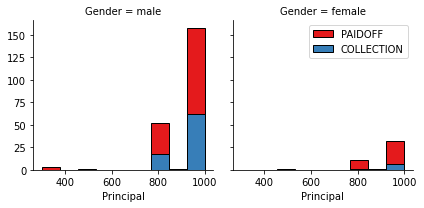

In [250]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

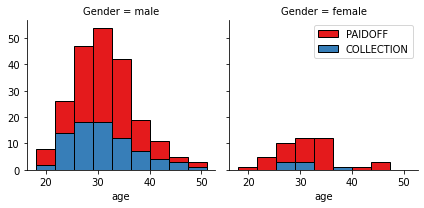

In [251]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at the day of the week people get the loan


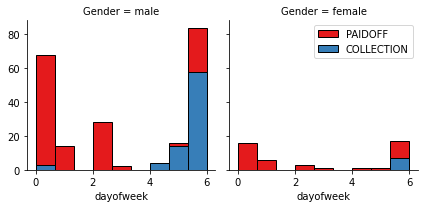

In [252]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 


In [253]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Lets look at gender:


In [254]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [255]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [256]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding


In [257]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [258]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection


Lets defind feature sets, X:


In [259]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [260]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [261]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

** Notice:** 

-   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
-   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
-   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [263]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [264]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857])

In [265]:
std_acc

array([0.05613914, 0.05673323, 0.05399492, 0.05548619, 0.05125253,
       0.05399492, 0.04904333, 0.05125253, 0.05125253, 0.05613914])

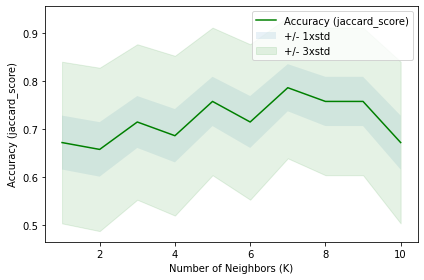

In [266]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy (jaccard_score)', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy (jaccard_score)')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [267]:
print( "The best accuracy was with jaccard_score =", mean_acc.max(), "with k=", mean_acc.argmax()+1)  

The best accuracy was with jaccard_score = 0.7857142857142857 with k= 7


In [268]:
#Train Model and Predict  
knn_best_model = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
knn_best_model

KNeighborsClassifier(n_neighbors=7)

In [269]:
yhat = knn_best_model.predict(X_test)
metrics.accuracy_score(y_test, yhat)

0.7857142857142857

# Decision Tree


In [270]:
from sklearn.tree import DecisionTreeClassifier

In [271]:
Max_max_depth = 15
mean_acc = np.zeros((Max_max_depth-1))
std_acc = np.zeros((Max_max_depth-1))

for n in range(1,Max_max_depth):
    
    #Train Model and Predict  
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=drugTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.64285714,
       0.77142857, 0.75714286, 0.75714286, 0.65714286, 0.7       ,
       0.7       , 0.7       , 0.7       , 0.72857143])

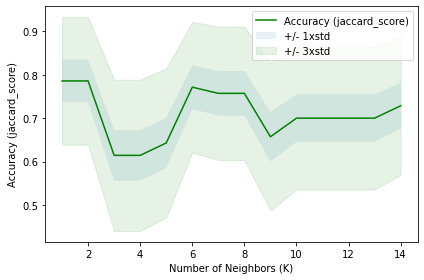

In [272]:
plt.plot(range(1,Max_max_depth),mean_acc,'g')
plt.fill_between(range(1,Max_max_depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Max_max_depth),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy (jaccard_score)', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy (jaccard_score)')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [273]:
print( "The best accuracy was with jaccard_score =", mean_acc.max(), "with k=", mean_acc.argmax()+1)  

The best accuracy was with jaccard_score = 0.7857142857142857 with k= 1


In [274]:
Max_max_depth = 15
mean_acc = np.zeros((Max_max_depth-1))
std_acc = np.zeros((Max_max_depth-1))

for n in range(1,Max_max_depth):
    
    #Train Model and Predict  
    drugTree = DecisionTreeClassifier(criterion="gini", max_depth = n).fit(X_train,y_train)
    yhat=drugTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.62857143,
       0.77142857, 0.75714286, 0.72857143, 0.64285714, 0.71428571,
       0.7       , 0.71428571, 0.72857143, 0.72857143])

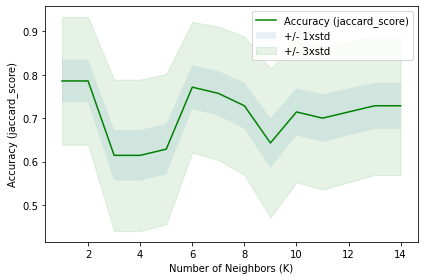

In [275]:
plt.plot(range(1,Max_max_depth),mean_acc,'g')
plt.fill_between(range(1,Max_max_depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Max_max_depth),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy (jaccard_score)', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy (jaccard_score)')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [276]:
print( "The best accuracy was with jaccard_score =", mean_acc.max(), "with k=", mean_acc.argmax()+1)  

The best accuracy was with jaccard_score = 0.7857142857142857 with k= 1


In [277]:
drugTree_best_model = DecisionTreeClassifier(criterion="entropy", max_depth = 2).fit(X_train,y_train)

In [278]:
drugTree_best_model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [279]:
yhat=drugTree_best_model.predict(X_test)
metrics.accuracy_score(y_test, yhat)

0.7857142857142857

# Support Vector Machine


In [280]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [281]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [282]:
from sklearn.metrics import jaccard_score

In [283]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

Confusion matrix, without normalization
[[55  0]
 [15  0]]
Confusion matrix, without normalization
[[53  2]
 [14  1]]
Confusion matrix, without normalization
[[48  7]
 [11  4]]
Confusion matrix, without normalization
[[51  4]
 [14  1]]


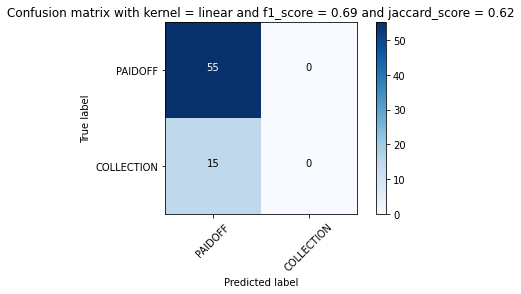

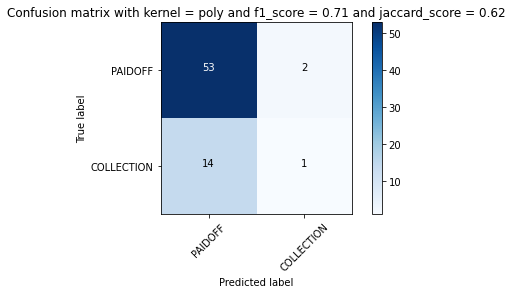

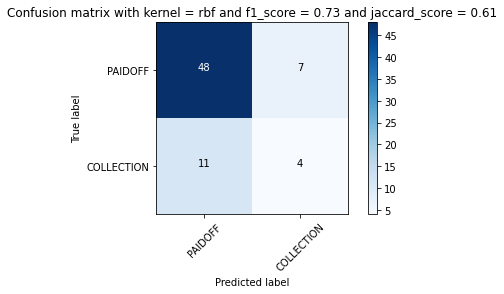

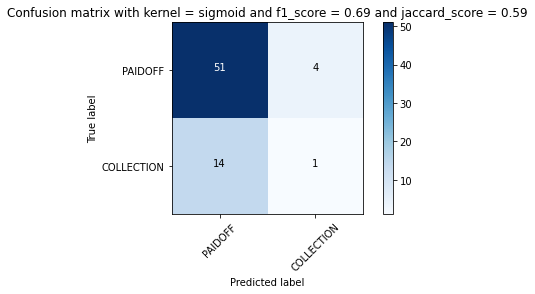

In [284]:
for kernel_value in kernel_list:
    clf = svm.SVC(kernel=kernel_value)
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, yhat, labels=['PAIDOFF', 'COLLECTION'])
    f1_score_value = f1_score(y_test, yhat, average='weighted') 
    jaccar_score_value = jaccard_score(y_test, yhat, labels=['PAIDOFF', 'COLLECTION'], average='weighted')
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF', 'COLLECTION'],normalize= False,  
                          title=f'Confusion matrix with kernel = {kernel_value} and f1_score = {format(round(f1_score_value, 2))} and jaccard_score = {format(round(jaccar_score_value, 2))}')

kernel = rbf is the best choise

In [285]:
svm_best_model = svm.SVC(kernel='rbf')
svm_best_model.fit(X_train, y_train) 

SVC()

In [286]:
yhat = svm_best_model.predict(X_test)
f1_score(y_test, yhat, average='weighted') 

0.7275882012724117

In [287]:
jaccard_score(y_test, yhat, labels=['PAIDOFF', 'COLLECTION'], average='weighted')

0.6103896103896104

# Logistic Regression


In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import seaborn as sns

In [291]:
list_solver = ['lbfgs', 'saga', 'liblinear', 'newton-cg']

In [292]:
list_c_values = [ 0.01, 0.1, 0.3, 0.5, 1]

In [293]:
C_values = len(list_c_values)
log_loss_values = np.zeros((C_values))
jaccar_score_values = np.zeros((C_values))

for i , c in enumerate(list_c_values):
    
    #Train Model and Predict  
    LR = LogisticRegression(C=c, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    jaccar_score_values[i] = jaccard_score(y_test, yhat, labels=['PAIDOFF', 'COLLECTION'], average='weighted')
    log_loss_values[i] = log_loss(y_test, yhat_prob)
    
print(log_loss_values)
print(jaccar_score_values)

[0.57722876 0.49819025 0.49418905 0.49590638 0.49994716]
[0.54936975 0.59915966 0.58658463 0.58658463 0.57410237]


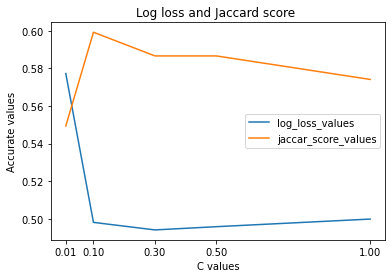

In [294]:
# plotting the line 1 points 
plt.plot(list_c_values, log_loss_values, label = "log_loss_values")
# line 2 points
x2 = [10,20,30]
y2 = [40,10,30]
# plotting the line 2 points 
plt.plot(list_c_values, jaccar_score_values, label = "jaccar_score_values")
plt.xlabel('C values')
# Set the y axis label of the current axis.
plt.ylabel('Accurate values')
# Set a title of the current axes.
plt.title('Log loss and Jaccard score ')
plt.xticks(list_c_values)
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

We can see that C= 0.01 has a low Log loss value en the highest value for jaccard_score

In [295]:
C_values = len(list_c_values)
log_loss_values = np.zeros((C_values))
jaccar_score_values = np.zeros((C_values))

for i , c in enumerate(list_c_values):
    
    #Train Model and Predict  
    LR = LogisticRegression(C=c, solver='lbfgs').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    jaccar_score_values[i] = jaccard_score(y_test, yhat, labels=['PAIDOFF', 'COLLECTION'], average='weighted')
    log_loss_values[i] = log_loss(y_test, yhat_prob)
    
print(log_loss_values)
print(jaccar_score_values)

[0.49201798 0.48275396 0.49063637 0.49472847 0.50018176]
[0.61734694 0.61612471 0.59915966 0.59915966 0.58658463]


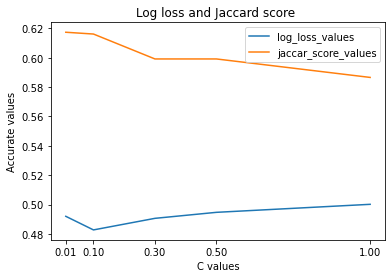

In [296]:
# plotting the line 1 points 
plt.plot(list_c_values, log_loss_values, label = "log_loss_values")
# line 2 points
x2 = [10,20,30]
y2 = [40,10,30]
# plotting the line 2 points 
plt.plot(list_c_values, jaccar_score_values, label = "jaccar_score_values")
plt.xlabel('C values')
# Set the y axis label of the current axis.
plt.ylabel('Accurate values')
# Set a title of the current axes.
plt.title('Log loss and Jaccard score ')
plt.xticks(list_c_values)
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [297]:
C_values = len(list_c_values)
log_loss_values = np.zeros((C_values))
jaccar_score_values = np.zeros((C_values))

for i , c in enumerate(list_c_values):
    
    #Train Model and Predict  
    LR = LogisticRegression(C=c, solver='saga').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    jaccar_score_values[i] = jaccard_score(y_test, yhat, labels=['PAIDOFF', 'COLLECTION'], average='weighted')
    log_loss_values[i] = log_loss(y_test, yhat_prob)
    
print(log_loss_values)
print(jaccar_score_values)

[0.49201819 0.48274853 0.49061507 0.49469309 0.50011269]
[0.61734694 0.61612471 0.59915966 0.59915966 0.58658463]


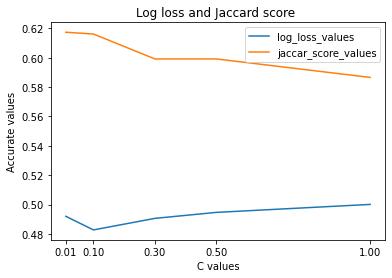

In [298]:
# plotting the line 1 points 
plt.plot(list_c_values, log_loss_values, label = "log_loss_values")
# line 2 points
x2 = [10,20,30]
y2 = [40,10,30]
# plotting the line 2 points 
plt.plot(list_c_values, jaccar_score_values, label = "jaccar_score_values")
plt.xlabel('C values')
# Set the y axis label of the current axis.
plt.ylabel('Accurate values')
# Set a title of the current axes.
plt.title('Log loss and Jaccard score ')
plt.xticks(list_c_values)
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [299]:
C_values = len(list_c_values)
log_loss_values = np.zeros((C_values))
jaccar_score_values = np.zeros((C_values))

for i , c in enumerate(list_c_values):
    
    #Train Model and Predict  
    LR = LogisticRegression(C=c, solver='newton-cg').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    jaccar_score_values[i] = jaccard_score(y_test, yhat, labels=['PAIDOFF', 'COLLECTION'], average='weighted')
    log_loss_values[i] = log_loss(y_test, yhat_prob)
    
print(log_loss_values)
print(jaccar_score_values)

[0.4920178  0.48275353 0.49063629 0.4947275  0.50018138]
[0.61734694 0.61612471 0.59915966 0.59915966 0.58658463]


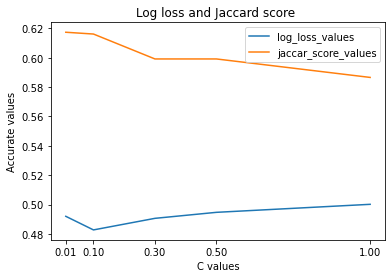

In [300]:
# plotting the line 1 points 
plt.plot(list_c_values, log_loss_values, label = "log_loss_values")
# line 2 points
x2 = [10,20,30]
y2 = [40,10,30]
# plotting the line 2 points 
plt.plot(list_c_values, jaccar_score_values, label = "jaccar_score_values")
plt.xlabel('C values')
# Set the y axis label of the current axis.
plt.ylabel('Accurate values')
# Set a title of the current axes.
plt.title('Log loss and Jaccard score ')
plt.xticks(list_c_values)
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

We'll take lbfgs solver with C=0.1 as the best option

In [301]:
LR_best_model = LogisticRegression(C=0.1, solver='lbfgs').fit(X_train,y_train)
yhat = LR_best_model.predict(X_test)

Confusion matrix, without normalization
[[53  2]
 [14  1]]


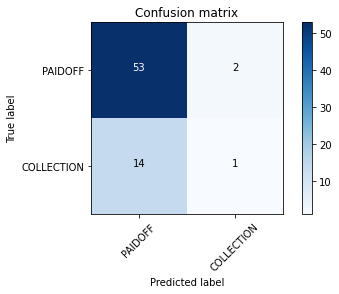

In [302]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=['PAIDOFF', 'COLLECTION'])

plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF', 'COLLECTION'],normalize= False,  
                          title=f'Confusion matrix')

In [303]:
jaccard_score(y_test, yhat, labels=['PAIDOFF', 'COLLECTION'], average='weighted')

0.6161247107538668

In [304]:
yhat_prob = LR_best_model.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.4827539604894662

# Model Evaluation using Test set


In [305]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [306]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
link_csv_loan_test = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'

### Load Test set for evaluation


In [307]:
test_df = pd.read_csv(link_csv_loan_test)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [308]:
test_df.shape

(54, 10)

In [309]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      54 non-null     int64 
 1   Unnamed: 0.1    54 non-null     int64 
 2   loan_status     54 non-null     object
 3   Principal       54 non-null     int64 
 4   terms           54 non-null     int64 
 5   effective_date  54 non-null     object
 6   due_date        54 non-null     object
 7   age             54 non-null     int64 
 8   education       54 non-null     object
 9   Gender          54 non-null     object
dtypes: int64(5), object(5)
memory usage: 4.3+ KB


In [310]:
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-08,2016-10-07,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-08,2016-09-22,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-09,2016-10-08,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-09,2016-10-08,29,Bechalor,male


In [311]:
test_df = test_df.drop(labels='Unnamed: 0', axis = 1).drop(labels='Unnamed: 0.1', axis = 1)
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,PAIDOFF,300,7,2016-09-08,2016-10-07,35,Master or Above,male
2,PAIDOFF,1000,30,2016-09-08,2016-09-22,43,High School or Below,female
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,26,college,male
4,PAIDOFF,800,15,2016-09-09,2016-10-08,29,Bechalor,male


In [312]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,PAIDOFF,300,7,2016-09-08,2016-10-07,35,Master or Above,male,3,0
2,PAIDOFF,1000,30,2016-09-08,2016-09-22,43,High School or Below,female,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,26,college,male,4,1
4,PAIDOFF,800,15,2016-09-09,2016-10-08,29,Bechalor,male,4,1


In [313]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,PAIDOFF,300,7,2016-09-08,2016-10-07,35,Master or Above,0,3,0
2,PAIDOFF,1000,30,2016-09-08,2016-09-22,43,High School or Below,1,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,26,college,0,4,1
4,PAIDOFF,800,15,2016-09-09,2016-10-08,29,Bechalor,0,4,1


In [314]:
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,PAIDOFF,300,7,2016-09-08,2016-10-07,35,Master or Above,0,3,0
2,PAIDOFF,1000,30,2016-09-08,2016-09-22,43,High School or Below,1,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,26,college,0,4,1
4,PAIDOFF,800,15,2016-09-09,2016-10-08,29,Bechalor,0,4,1


In [315]:
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [316]:
X = Feature_test
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [317]:
y = test_df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [318]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -4.12310563,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -4.12310563,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -4.12310563,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.24253563,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.24253563,
         2.39791576, -0.79772404, -0.86135677]])

# K Nearest Neighbor(KNN)

In [319]:
knn_best_model

KNeighborsClassifier(n_neighbors=7)

In [320]:
yhat = knn_best_model.predict(X)
knn_jaccard = metrics.accuracy_score(y, yhat)
knn_jaccard

0.6851851851851852

In [321]:
knn_f1_score = f1_score(y, yhat, average='weighted')
knn_f1_score

0.6453810131971051

# Decision Tree

In [322]:
drugTree_best_model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [323]:
yhat=drugTree_best_model.predict(X)
dec_tree_jaccard = metrics.accuracy_score(y, yhat)
dec_tree_jaccard

0.7407407407407407

In [324]:
dec_tree_f1_score = f1_score(y, yhat, average='weighted')
dec_tree_f1_score

0.6304176516942475

# Support Vector Machine

In [325]:
svm_best_model

SVC()

In [326]:
yhat = svm_best_model.predict(X)
svm_jaccard = jaccard_score(y, yhat, labels=['PAIDOFF', 'COLLECTION'], average='weighted')
svm_jaccard

0.6759889140841522

In [327]:
svm_f1_score = f1_score(y, yhat, average='weighted')
svm_f1_score

0.7861952861952862

# Logistic Regression

In [328]:
LR_best_model

LogisticRegression(C=0.1)

In [329]:
yhat = LR_best_model.predict(X)
lr_jaccard = jaccard_score(y, yhat, labels=['PAIDOFF', 'COLLECTION'], average='weighted')
lr_jaccard

0.5486968449931412

In [330]:
lr_f1_score = f1_score(y, yhat, average='weighted')
lr_f1_score

0.6304176516942475

In [331]:
yhat_prob = LR_best_model.predict_proba(X)
lr_log_loss = log_loss(y, yhat_prob)
lr_log_loss

0.5456863773662185

In [332]:
list_algortithm = [ 'KNN', 'Decision Tree', 'SVM', 'LogisticRegression']

In [335]:
list_jaccard = [ knn_jaccard, dec_tree_jaccard, svm_jaccard, lr_jaccard]

In [336]:
list_f1_score = [ knn_f1_score, dec_tree_f1_score, svm_f1_score, lr_f1_score ]

In [337]:
list_log_loss = ['NA', 'NA', 'NA', lr_log_loss ]

In [338]:
dict_results = {'Algorithm': list_algortithm, 
     'Jaccard': list_jaccard,
     'F1-score': list_f1_score, 
     'LogLoss': list_log_loss,
    
    }
df_results = pd.DataFrame(data=dict_results)

In [339]:
df_results

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.685185,0.645381,NA
1,Decision Tree,0.740741,0.630418,NA
2,SVM,0.675989,0.786195,NA
3,LogisticRegression,0.548697,0.630418,0.545686


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
